### Importation of the module

In [49]:
import sys
sys.path.append('../')

from main import *

### Creation of the linear model

In [50]:
momo = MODEL()

momo.creat_linear(4)

momo.enzymes.add_to_all_reaction()
momo.parameters.add_enzymes()

momo.parameters.add_externals()

momo.elasticity.s.half_satured()

Model created 
 
To add metabolite, use .metabolites.add_meta 
To add reaction,   use .reactions.add_reaction
Model created 
 
To add metabolite, use .metabolites.add_meta 
To add reaction,   use .reactions.add_reaction


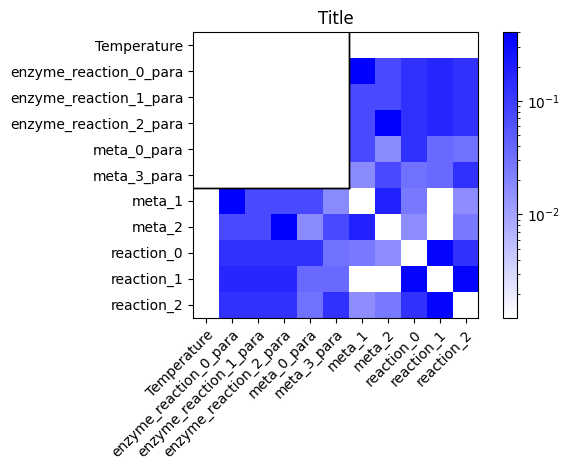

(<Figure size 640x480 with 2 Axes>,
 <AxesSubplot: title={'center': 'Title'}>,
 <matplotlib.image.AxesImage at 0x7ff3d70575b0>)

In [43]:
momo.plot(result="MI", title="Title", label=True)

### You can then begin the analysis of the model

In [44]:
momo.MI

,Temperature,enzyme_reaction_0_para,enzyme_reaction_1_para,enzyme_reaction_2_para,meta_0_para,meta_3_para,meta_1,meta_2,reaction_0,reaction_1,reaction_2
Temperature,inf,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
enzyme_reaction_0_para,-0.0,inf,-0.000000,-0.000000,-0.000000,-0.000000,0.401173,0.074210,0.134132,0.168236,0.134132
enzyme_reaction_1_para,-0.0,-0.000000,inf,-0.000000,-0.000000,-0.000000,0.074210,0.074210,0.134132,0.168236,0.134132
enzyme_reaction_2_para,-0.0,-0.000000,-0.000000,inf,-0.000000,-0.000000,0.074210,0.401173,0.134132,0.168236,0.134132
meta_0_para,-0.0,-0.000000,-0.000000,-0.000000,inf,-0.000000,0.074210,0.017546,0.134132,0.037054,0.030312
meta_3_para,-0.0,-0.000000,-0.000000,-0.000000,-0.000000,inf,0.017546,0.074210,0.030312,0.037054,0.134132
meta_1,-0.0,0.401173,0.074210,0.074210,0.074210,0.017546,inf,0.181490,0.026020,0.001233,0.016496
meta_2,-0.0,0.074210,0.074210,0.401173,0.017546,0.074210,0.181490,inf,0.016496,0.001233,0.026020
reaction_0,-0.0,0.134132,0.134132,0.134132,0.134132,0.030312,0.026020,0.016496,inf,0.355048,0.125163
reaction_1,-0.0,0.168236,0.168236,0.168236,0.037054,0.037054,0.001233,0.001233,0.355048,inf,0.355048


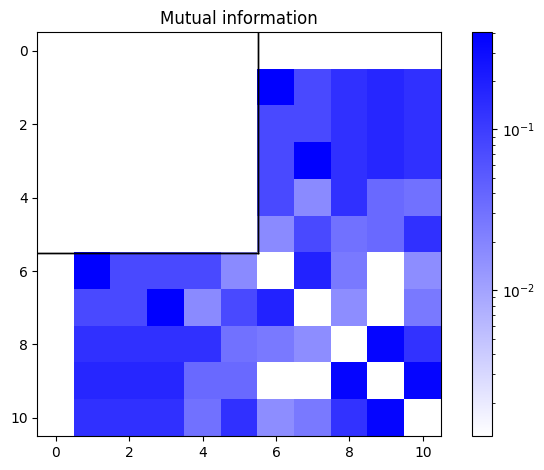

In [4]:
momo.plot(result="MI")

### You can add regulation arrows

In [5]:
momo.reactions.df

,Metabolites,Equilibrium constant,Law,Flux (mmol/gDW/h)
reaction_0,"{'meta_0': -1, 'meta_1': 1}",1.0,,1
reaction_1,"{'meta_1': -1, 'meta_2': 1}",1.0,,1
reaction_2,"{'meta_2': -1, 'meta_3': 1}",1.0,,1


#### Exernite metabolite too ?

In [6]:
momo.regulations.add(name="regu_alo", regulated="reaction_1", regulator="meta_2", allosteric=True)

In [7]:
momo.regulations.add(name="regu_transcri", regulated="reaction_1", regulator="meta_2", allosteric=False)

In [8]:
momo.regulations.df

,Regulated flux,Regulator,Coefficient of regulation,Type regulation
regu_alo,reaction_1,meta_2,1,allosteric
regu_transcri,reaction_1,meta_2,1,transcriptional


#### You can also study periodic perturbation

In [9]:
momo.frequency_omega = 1.0

In [10]:
momo.Jacobian

,meta_1,meta_2,enzyme_regu_transcri
meta_1,-1.000000e+00-1.000000e+00j,-0.5+0.0j,0.0+0.0j
meta_2,5.000000e-01+0.000000e+00j,-0.0-1.0j,0.0+0.0j
enzyme_regu_transcri,2.775558e-16+0.000000e+00j,1.0+0.0j,0.0-1.0j


#### You can also study temporal control coefficients

In [11]:
momo.frequency_omega = 0.0

In [12]:
momo.temporal_C_s_p(t=1)

array([[ 0.55972788, -0.83374146,  0.27401359, -0.02340139,  0.02340139],
       [-0.22246844,  0.38406222, -0.16159378, -0.20143823,  0.20143823],
       [-0.22958199,  0.13123405,  0.09834793,  0.85255571, -0.85255571]])

In [13]:
momo.temporal_R_s_p(t=1)

array([[ 0.        ,  0.55972788, -0.83374146,  0.27401359,  0.        ,
         0.        ],
       [ 0.        , -0.22246844,  0.38406222, -0.16159378,  0.        ,
         0.        ],
       [ 0.        , -0.22958199,  0.13123405,  0.09834793,  0.        ,
         0.        ]])

#### Thermodynamic sampling of the elsaticity coefficient

In [14]:
momo.elasticity.s.fill_sub_elasticity()

In [15]:
momo.elasticity.s.df

,meta_1,meta_2,enzyme_regu_transcri
reaction_0,0.802638,-0.852706,0.098912
reaction_1,0.450545,0.170971,-0.462326
reaction_2,0.141400,0.267011,0.177046
creation_regu_transcri,-0.378785,-0.198671,-0.667285
destruction_regu_transcri,-0.459874,0.826962,-0.156521


#### It is possible to study group of variable

In [16]:
momo.covariance

,Temperature,enzyme_reaction_0_para,enzyme_reaction_1_para,enzyme_reaction_2_para,meta_0_para,meta_3_para,meta_1,meta_2,enzyme_regu_transcri,reaction_0,reaction_1,reaction_2,creation_regu_transcri,destruction_regu_transcri
Temperature,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
enzyme_reaction_0_para,0.0,1.000000,0.000000,0.000000,0.0,0.0,-1.223786,0.213921,-0.623849,-0.226375,-0.226375,-0.226375,0.837337,0.837337
enzyme_reaction_1_para,0.0,0.000000,1.000000,0.000000,0.0,0.0,-0.991956,-0.668467,1.184822,-0.108983,-0.108983,-0.108983,-0.282071,-0.282071
enzyme_reaction_2_para,0.0,0.000000,0.000000,1.000000,0.0,0.0,2.215742,0.454546,-0.560973,1.335358,1.335358,1.335358,-0.555266,-0.555266
meta_0_para,0.0,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
meta_3_para,0.0,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
meta_1,0.0,-1.223786,-0.991956,2.215742,0.0,0.0,7.391141,1.408452,-1.654804,3.343948,3.343948,3.343948,-1.975246,-1.975246
meta_2,0.0,0.213921,-0.668467,0.454546,0.0,0.0,1.408452,0.699222,-1.180456,0.631406,0.631406,0.631406,0.115285,0.115285
enzyme_regu_transcri,0.0,-0.623849,1.184822,-0.560973,0.0,0.0,-1.654804,-1.180456,2.107680,-0.737001,-0.737001,-0.737001,-0.545086,-0.545086
reaction_0,0.0,-0.226375,-0.108983,1.335358,0.0,0.0,3.343948,0.631406,-0.737001,1.846303,1.846303,1.846303,-0.900290,-0.900290


In [17]:
momo.group_MI(groups=[["meta_1", "reaction_0"],["meta_3_para","meta_0_para"]])

,0,1
0,inf,0.0
1,0.0,inf


#### We can also fix value

In [18]:
momo.parameters.remove("Temperature")

Name of the removed parameter : Temperature


In [19]:
momo.covariance

,enzyme_reaction_0_para,enzyme_reaction_1_para,enzyme_reaction_2_para,meta_0_para,meta_3_para,meta_1,meta_2,enzyme_regu_transcri,reaction_0,reaction_1,reaction_2,creation_regu_transcri,destruction_regu_transcri
enzyme_reaction_0_para,1.000000,0.000000,0.000000,0.0,0.0,-1.223786,0.213921,-0.623849,-0.226375,-0.226375,-0.226375,0.837337,0.837337
enzyme_reaction_1_para,0.000000,1.000000,0.000000,0.0,0.0,-0.991956,-0.668467,1.184822,-0.108983,-0.108983,-0.108983,-0.282071,-0.282071
enzyme_reaction_2_para,0.000000,0.000000,1.000000,0.0,0.0,2.215742,0.454546,-0.560973,1.335358,1.335358,1.335358,-0.555266,-0.555266
meta_0_para,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
meta_3_para,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
meta_1,-1.223786,-0.991956,2.215742,0.0,0.0,7.391141,1.408452,-1.654804,3.343948,3.343948,3.343948,-1.975246,-1.975246
meta_2,0.213921,-0.668467,0.454546,0.0,0.0,1.408452,0.699222,-1.180456,0.631406,0.631406,0.631406,0.115285,0.115285
enzyme_regu_transcri,-0.623849,1.184822,-0.560973,0.0,0.0,-1.654804,-1.180456,2.107680,-0.737001,-0.737001,-0.737001,-0.545086,-0.545086
reaction_0,-0.226375,-0.108983,1.335358,0.0,0.0,3.343948,0.631406,-0.737001,1.846303,1.846303,1.846303,-0.900290,-0.900290
reaction_1,-0.226375,-0.108983,1.335358,0.0,0.0,3.343948,0.631406,-0.737001,1.846303,1.846303,1.846303,-0.900290,-0.900290


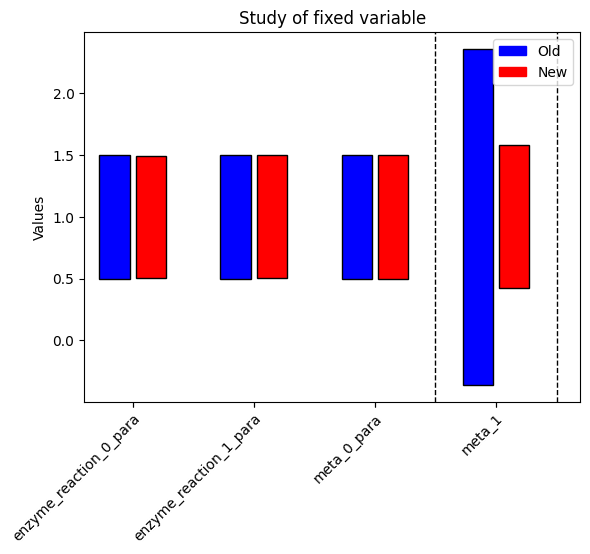

In [20]:
momo.boxplot(elements_to_fixe=["reaction_2"], elements_to_study=["enzyme_reaction_0_para", "enzyme_reaction_1_para", "meta_0_para", "meta_1"])

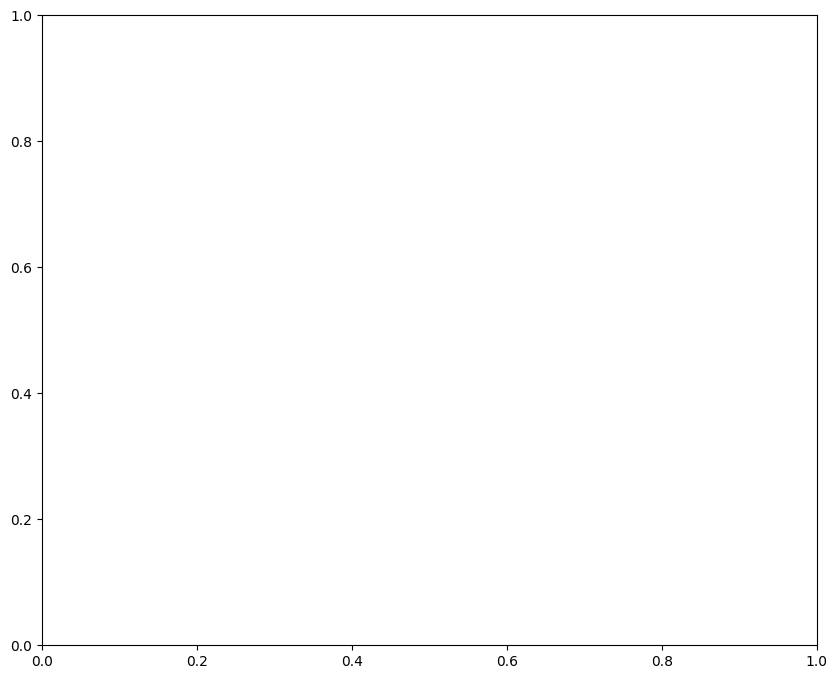

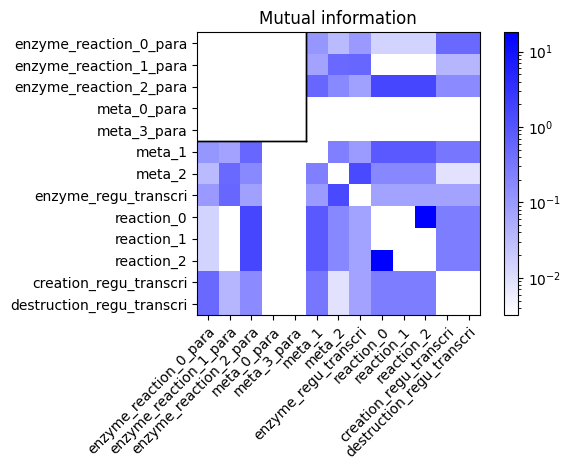

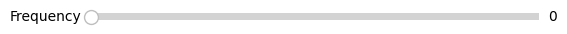

In [21]:
momo.graphic_interface()